# Práctica 2: Sistemas y Convolución

In [1]:
# imports
import numpy as np
from matplotlib import pyplot as plt
%matplotlib widget


## Sistemas

### Ejercicio 1:
Para cada uno de los siguientes sistemas determine si son causales, lineales, invariantes en el tiempo y si poseen memoria. En cada caso grafique la salida del sistema $y[n]$ para una entrada dada.

Sistemas Causales: Si su salida en cualquier instante de tiempo depende solo de los valores de la entrada en el instante actual y en instantes anteriores. Es decir, que NO deben conocerse con anticipación los valores futuros de la entrada.

Sistemas con memoria: son sistemas donde la salida depende de valores anteriores de la entrada del sistema. Los sistemas sin memoria tienen una salida que depende solo de la entrada en ese instante.

Sistemas invariantes en el tiempo: son sistemas donde un desplazamiento en la entrada produce el mismo desplazamiento en la salida. Corresponde con decir que los coeficientes de la ecuación que definen el sistema sean constantes.

Sistemas lineales: corresponde a sistemas en los cuales una superposición de señales (o suma ponderada) en la entrada, produce salidas que son una superposición de las salidas de cada una de las señales ponderadas.

1. $ y[n] = g[n]x[n]$ , donde $g[n] = A sin( \omega n T)$ siendo A constante, $ω = 2 \pi f$ y T el período de muestreo.

Corresponde a un sistema sin memoria dado que la salida depende solo de la entrada actual.

Se trata de un sistema Causal, dado que no se requieren conocer valores futuros de la entrada.

Es un sistema variante en el tiempo ya que un desplazamiento en la entrada no produce el mismo desplazamiento en la salida, dado que el coeficiente de la ecuación del sistema es variable con respecto a n.

2. $ y[n] = \sum_{k= n - n_0}^{n + n_0} x[k] $

Corresponde a un sistema con memoria ya que la salida depende no solo de la entrada actual sino de entradas anteriores también.

Se trata de un sistema no causal ya que requiere conocer valores futuros de la entrada.

Es un sistema invariante en el tiempo, ya que los coeficientes son constantes.

3. $ y[n] = x[n] + 2 $

Corresponde a un sistema sin memoria dado que la salida depende solo de la entrada actual.

Se trata de un sistema Causal, dado que no se requieren conocer valores futuros de la entrada.

Es un sistema invariante en el tiempo, ya que los coeficientes son constantes.

4. $ y[n] = nx[n] $

Corresponde a un sistema sin memoria dado que la salida depende solo de la entrada actual.

Se trata de un sistema Causal, dado que no se requieren conocer valores futuros de la entrada.

Es un sistema invariante en el tiempo, ya que los coeficientes son constantes.



In [ ]:
# Sistemas
#1- 
def y1(x,A,fs,Tm):
    n = np.arange(0,len(x),1)
    return A*np.sin(2*np.pi*fs*n*Tm)*x

x = np.ones(25)
y = y1(x, 2, 4, 1/50)
plt.close('all')
plt.stem(y)
plt.show()

#2-
def y2(x, n0):
    y = np.zeros(len(x))
    for n in range(len(x)):
        k = np.nonzero(np.arange(n-n0, n+n0, 1)>=0)
        k = k[0]
        y[n] = np.sum(x[k[0]:k[len(k)-1]])
    return y

x = np.ones(10)
y_2 = y2(x,3)
plt.close('all')
plt.stem(y_2)
plt.show()

# 3- 
def y3(x):
    return x + 2

x = np.arange(1, 50, 1)
y_3 = y3(x)
plt.close('all')
plt.stem(y_3)
plt.show()

# 4-
def y4(x):
    n = np.arange(0,len(x),1)
    return n*x

x = np.ones(25)
y_4 = y4(x)
plt.close('all')
plt.stem(y_4)
plt.show()


### Ejercicio 2: 
Considere el diagrama en bloques de la Figura y encuentre la ecuación en diferencias para la señal de salida $y[n]$ en función de la señal de entrada $x[n]$

![title](img/sistema_guia2_ej2.png)


La ecuación del sistema de la figura es 

$$ y[n]^2 = x[n]^2 - 2x[n-1]x[n] + x[n-1]^2 $$

Por trinomio cuadrado perfecto, la expresión después del igual es equivalente a hacer:

$$ y[n]^2 = ( x[n-1] - x[n] ) ^2 $$

Y la ecuación en diferencias queda:

$$ y[n] = x[n-1] - x[n] $$

### Ejercicio 3:
Considere el sistema LTI dado por la ecuación en diferencias $ y[n] − 0,5 y[n−1] + 0, 25 y[n−2] = x[n] $ inicialmente en reposo. Encuentre el diagrama en bloques que lo representa.

![title](img/sistema_guia2.png)


### Ejercicio 4:
Encuentre la respuesta al impulso de los sistemas LTI causales descriptos por las siguientes ecuaciones en diferencias y clasifíquelos en función de ésta. Utilice condiciones iniciales nulas.

Clasificación según la respuesta al impulso:
- Respuesta finita al impulso (FIR): pasado cierto tiempo el sistema se vuelve a cero.
- Respuesta infinita al impulso (IIR): la respuesta al impulso del sistema nunca se agota. Se debe generalmente a que la salida depende de salidas anteriores no nulas, y esto se repite indefinidamente.

1. $ y[n] − y[n − 2] = x[n] $
2. $ y[n] = x[n] + 0,5x[n − 1] $
3. $ y[n] − 0,5y[n − 1] + 0,25y[n − 2] = x[n] $


## Convolución

### Ejercicio 1
Implemente la convolución lineal mediante una sumatoria de convolución. Pruébela para convolucionar dos señales cualesquiera de longitud N muestras. Compare los resultados con los obtenidos mediante la función $conv(x,y)$ y con la función $filter$.

La función $ Y = filter(B,A,X) $ implementa la ecuación en diferencias, para los coeficientes dados en los vectores A y B y la señal de entrada X, según:

$ a(1)*y(n) = b(1)*x(n) + b(2)*x(n-1) + ... - a(2)*y(n-1) - ... $

A partir de esto, determine los valores a ingresar en los vectores A y B para obtener la salida esperada.

#### Convolución Lineal:

Convolución discreta o sumatoria de convolución
$$ y[n] = \sum_{i = 0}^{N - 1} x[i] h[k-i]$$

In [15]:
# Convolución Lineal

def  linear_conv(x,h):
  n_c = len(x)+len(h)-1
  conv=np.zeros(n_c)
  for i in range(len(h)):
    aux = 0
    for k in range (len(x)):
      print("i:",i,"- k:",k)
      aux = x[k]*h[i]
      conv[i+k] = conv[i+k]+aux
  return conv

i: 0 - k: 0
i: 0 - k: 1
i: 0 - k: 2
i: 1 - k: 0
i: 1 - k: 1
i: 1 - k: 2
i: 2 - k: 0
i: 2 - k: 1
i: 2 - k: 2
conv lineal entre x1 y x2 [2.  4.5 6.  3.  2. ]


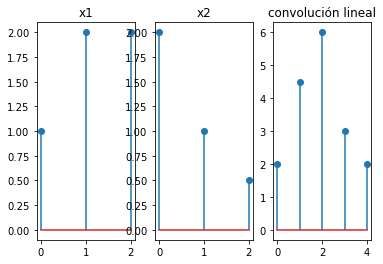

In [21]:
#Prueba
x1 = [1, 2, 2]; x2 = [2, 1, 0.5]
conv = linear_conv(x1, x2)

plt.close('all')
fig, axs = plt.subplots(1, 3)
axs[0].stem(x1); axs[0].title.set_text('x1')
axs[1].stem(x2); axs[1].title.set_text('x2')
axs[2].stem(conv); axs[2].title.set_text('convolución lineal')

print("conv lineal entre x1 y x2", conv)

### Ejercicio 2:
Escriba una función que realice la convolución circular discreta (tambien llamada convolución periódica) entre dos señales $x[n]$ y $h[n]$, ambas de longitud longitud N muestras, utilizando ciclos for. En ésta se debe considerar a $x[n]$ periódica, pero $ h[n] $ debe ser nula fuera de su rango de definición. La convolución circular se puede expresar mediante la siguiente ecuación:

$$ y[k] = \sum_{l = 1}^{N} h[l]x[((N + k − l)modN) + 1] $$

para $ 1 ≤ k ≤ N $, donde $mod$ es la operación módulo entero (resto de la división entera).

In [6]:
import numpy as np
from matplotlib import pyplot as plt
def circ_conv_2(x,y):
  n = len(x)
  z = np.zeros(n)
  for k in range(n):
    aux = 0
    for l in range(n):
      aux = y[np.mod(n+k-l,n)]*x[l]
      z[k]= z[k] + aux
  return z

conv circular entre x1 y x2 [3.  5.  6.5 3. ]


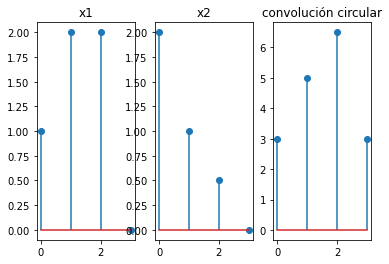

In [13]:
#Prueba
x1 = [1, 2, 2, 0]; x2 = [2, 1, 0.5, 0]
conv = circ_conv_2(x2, x1)

plt.close('all')
fig, axs = plt.subplots(1, 3)
axs[0].stem(x1); axs[0].title.set_text('x1')
axs[1].stem(x2); axs[1].title.set_text('x2')
axs[2].stem(conv); axs[2].title.set_text('convolución circular')

print("conv circular entre x1 y x2", conv)

### Ejercicio 3

Considere dos sistemas LTI conectados en cascada (Figura 2), con respuestas al impulso dadas por $h_A[n] = sin(8n)$ y $h_B[n] = a^n $ , donde $ a ∈ R $ , $ |a| < 1 $ y $ 0 \leq n \leq N − 1 $, con N el número de muestras distintas de cero. Obtenga N muestras de las respuestas al impulso, $h_A$ y $h_B$, según las definiciones dadas, y determine la salida $y[n]$ para una entrada $x[n] = δ[n] − a\delta[n − 1] $, siendo $\delta[n]$ es la función de impulso unitario. Luego invierta
el orden de conexión de los sistemas y vuelva a calcular la salida. Compare con la salida obtenida originalmente.

entrada [ 1.  -0.5  0.   0.   0.   0.   0.   0. ]
respuesta impulso A: [ 0.          0.98935825 -0.28790332 -0.90557836  0.55142668  0.74511316
 -0.76825466 -0.521551  ]
respuesta impulso B: [1.        0.5       0.25      0.125     0.0625    0.03125   0.015625
 0.0078125]
PRUEBA 1
conv x con impulso a [ 0.          0.98935825 -0.78258244 -0.7616267   1.00421586  0.46939982
 -1.14081124 -0.13742367  0.2607755   0.          0.          0.
  0.          0.          0.        ]
conv de x con impulso a, con b: salida del sistema [ 0.          0.98935825 -0.28790332 -0.90557836  0.55142668  0.74511316
 -0.76825466 -0.521551    0.         -0.00386468  0.00112462  0.00353742
 -0.00215401 -0.0029106   0.00300099  0.00203731  0.          0.
  0.          0.          0.          0.        ]
PRUEBA 2
conv x con impulso b [ 1.          0.          0.          0.          0.          0.
  0.          0.         -0.00390625  0.          0.          0.
  0.          0.          0.        ]
conv de x c

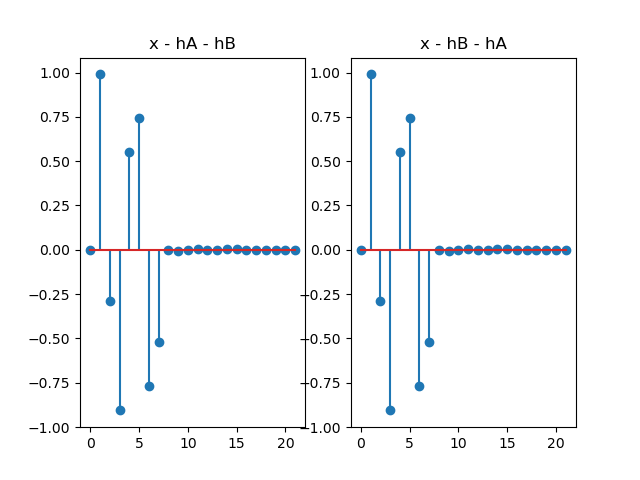

In [67]:
def h_A(N):
    n = np.arange(0,N,1)
    return np.sin(8*n)

def h_B(N,a):
    n = np.arange(0,N,1)
    return np.power(a,n)


a = 0.5
N = 8
x = np.zeros(N)
delta = np.zeros(N); delta[0] = 1
for n in range(len(delta)):
    aux = 0
    if(n-1 >= 0 ):
        aux = delta[n-1]
    x[n] = delta[n] - a * aux
print("entrada",x)

h_a = h_A(N)
h_b = h_B(N,a)
print('respuesta impulso A:',h_a)
print('respuesta impulso B:',h_b)

print("PRUEBA 1")
conv_x_a = np.convolve(x,h_a)
print("conv x con impulso a",conv_x_a)

conv_a_b = np.convolve(conv_x_a,h_b)
print("conv de x con impulso a, con b: salida del sistema",conv_a_b)


print("PRUEBA 2")

conv_x_b = np.convolve(x,h_b)
print("conv x con impulso b",conv_x_b)

conv_b_a = np.convolve(conv_x_b,h_a)
print("conv de x con impulso b, con a: salida del sistema",conv_b_a)

plt.close('all')
fig, axs = plt.subplots(1, 2)
axs[0].stem(conv_a_b); axs[0].title.set_text('x - hA - hB')
axs[1].stem(conv_b_a); axs[1].title.set_text('x - hB - hA')